# Advanced Numerical Analysis

## Exercise 30

*Consider the initial value problem*
$$\begin{cases}
y'(t) = y(t) - \frac{2t}{y(t)}, \quad t \in [0, 1.5] \\
y(0) = 1.
\end{cases}$$

*Write a program which computes approximate solutions with fixed step size according to Euler’s method, the first and second half step methods and the classical Runge–Kutta method. In each case compare with the solution* $y(t) = \sqrt{2t+1}$ *at the point* $t=1.5,$ *for step sizes* $h = 0.1, 0.01, 0.001.$

*Why is Euler’s method more accurate at large times?*
$$ $$

Definitions of Euler's and the classical Runge-Kutta method:

In [2]:
function y = Euler(F, y0, t)    
    m = length(y0);
    n = length(t);
    y = zeros(m, n);
    y(:,1) = y0;
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        y(:,k+1) = y(:,k) + h * F(t(k), y(:,k));
    endfor
endfunction

function y = RK4(F, y0, t)    
    m = length(y0);
    n = length(t);
    y = zeros(m, n);
    y(:,1) = y0;
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        k1 = F(t(k), y(:,k));
        k2 = F(t(k) + h/2, y(:,k) + h/2 * k1);
        k3 = F(t(k) + h/2, y(:,k) + h/2 * k2);
        k4 = F(t(k+1), y(:,k) + h * k3);
        y(:,k+1) = y(:,k) + h/6 * (k1 + 2*k2 + 2*k3 + k4);
    endfor
endfunction

Definition of given data:

In [3]:
interval = [0, 1.5];
hs = [0.1, 0.01, 0.001];
y0 = 1;

function y_prime = F(t, y)
    y_prime = y - 2 * t / y;
endfunction

function y = exact(t)
    y = sqrt(2*t + 1);
endfunction

Computation of all approximations and errors:

In [4]:
for i = 1 : length(hs)
    t{i} = interval(1):hs(i):interval(2);
    euler_vals{i} = Euler(@F, y0, t{i});
    rk4_vals{i} = RK4(@F, y0, t{i});
    exact_vals{i} = exact(t{i});
    euler_errs(i) = abs(exact_vals{i}(end) - euler_vals{i}(end));
    rk4_errs(i) = abs(exact_vals{i}(end) - rk4_vals{i}(end));
endfor

Plots of approximations:

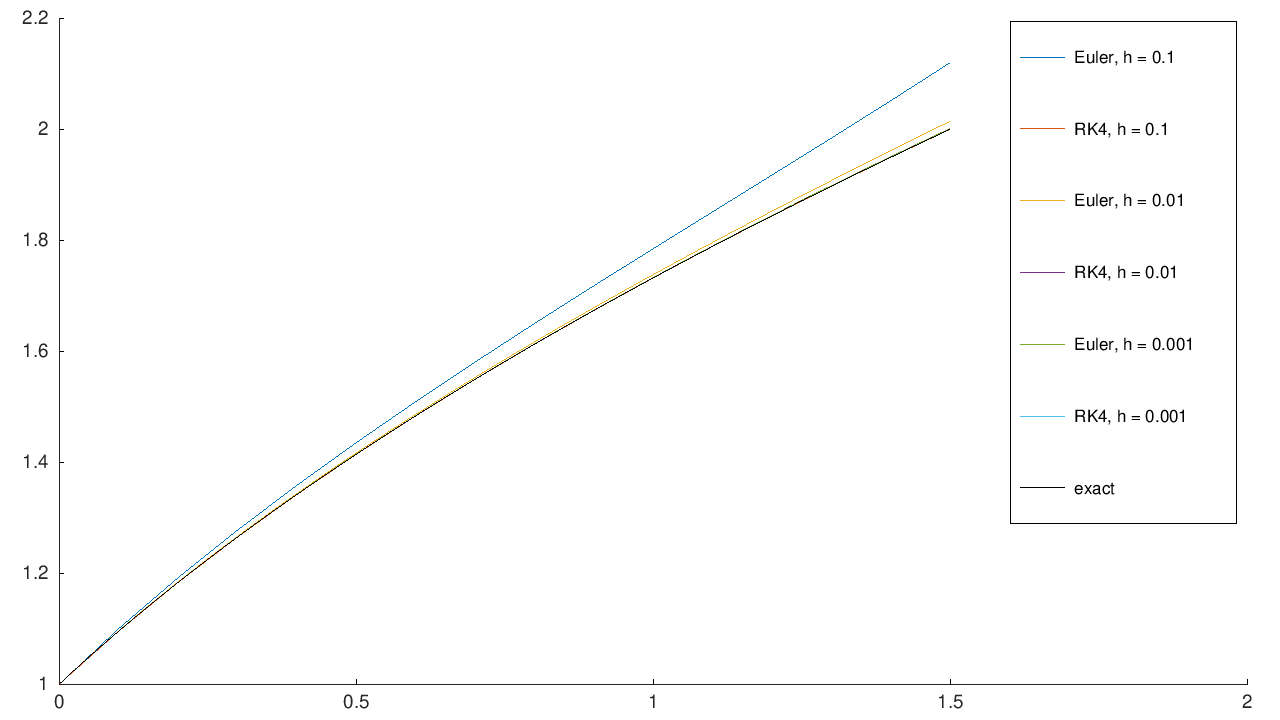

In [6]:
%plot -s 1280,720

hold on;
for i = 1 : length(hs)
    euler_str = sprintf("Euler, h = %g", hs(i));
    plot(t{i}, euler_vals{i}, "DisplayName", euler_str)
    rk4_str = sprintf("RK4, h = %g", hs(i));
    plot(t{i}, rk4_vals{i}, "DisplayName", rk4_str)
endfor
plot(t{3}, exact_vals{3}, "k", "DisplayName", "exact")
legend();

Plots of errors:

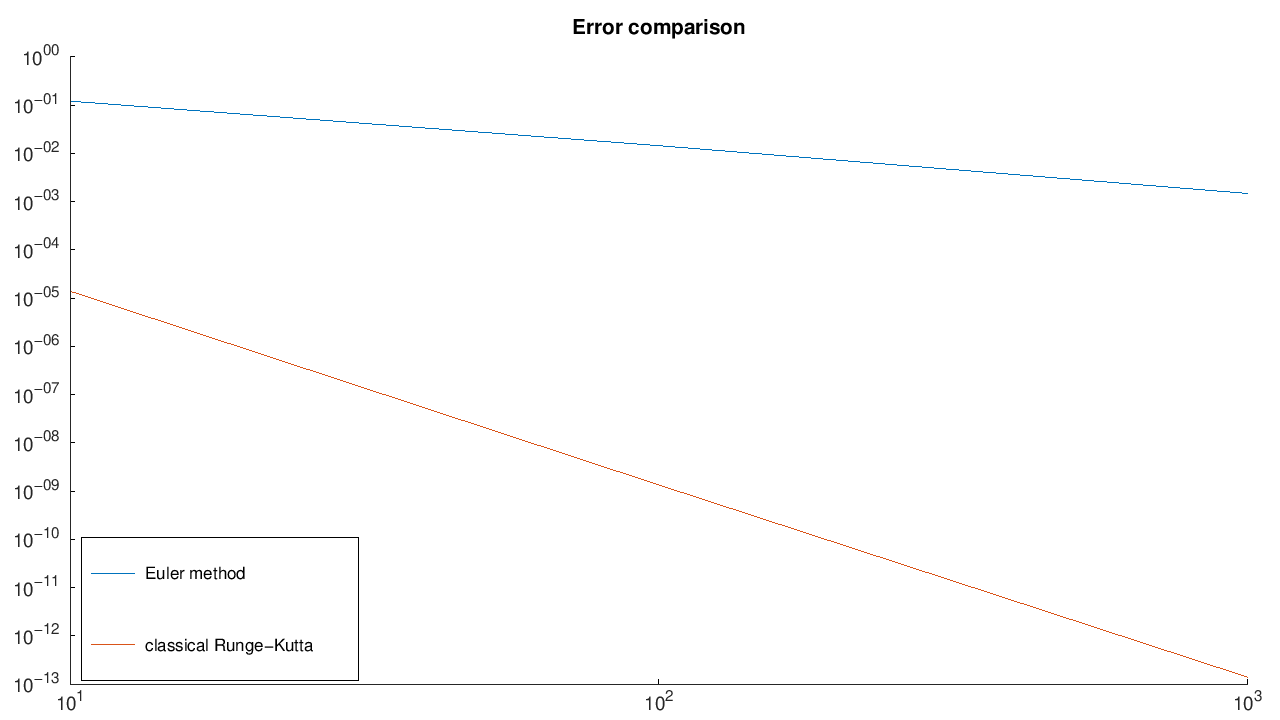

In [7]:
hold on;
loglog(1./hs, euler_errs)
loglog(1./hs, rk4_errs)
title("Error comparison");
legend("Euler method", "classical Runge-Kutta", "location", "southwest");

As expected the classical Runge-Kutta method performs better than Euler's since it is of order 4 instead of 1.

In [10]:
printf("approximate order of Euler's method: %.4f\n", log(euler_errs(end) / euler_errs(1)) / log(hs(end) / hs(1)))
printf("approximate order of classical Runge-Kutta method: %.4f\n", log(rk4_errs(end) / rk4_errs(1)) / log(hs(end) / hs(1)))

approximate order of Euler's method: 0.9563
approximate order of classical Runge-Kutta method: 3.9994
